# Notebook voltado para aqueles estão iniciando sua jornada de conhecimento em computação quântica

Neste notebook você encontrará:

1. Os conceitos e a representação de _qubit_ usando qiskit
2. Como manipular esses qubits usando gates quânticos

In [3]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-08-03 19:02:09,320: Credentials are already in use. The existing account in the session will be replaced.


## Iniciando seu circuito


O qubit é a menor unidade de informação quântica.
Ao construir um circuito quântico o que estamos querendo é encontrar a melhor maneira de manipular esses qubits (informação) para obter o resultado desejado.

Vamos iniciar nosso circuito!

Abaixo veremos um circuito com n=4 qubits.
Por construção todos os qubits são iniciados no estado quântico $\vert 0 \rangle$

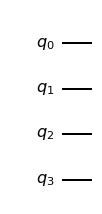

In [4]:
# Criando um circuito de n qubits
n = 4
qc = QuantumCircuit(n)

#Desenhando o circuito
qc.draw()

## Verificando o estado de cada qubit

1. Abaixo executamos o circuito que simula o estado quântico em que os qubits do circuito se encontram.
2. Posteriomente plotamos os qubits mostrando a sua localização na esfera de Bloch (espaço vetorial para representação de um qubit.
3. Como podemos ver todos os qubits estão inicializados no estado $\vert 0\rangle$ (localizado no topo da esfera de Bloch).

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


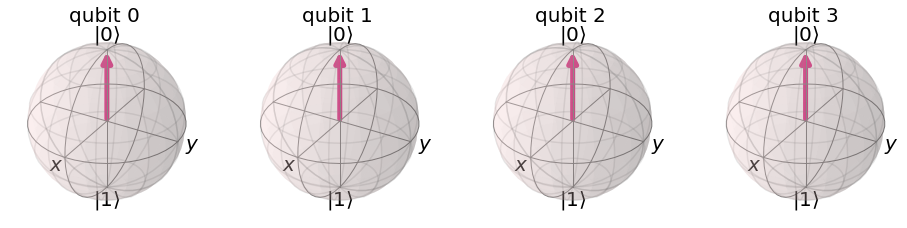

In [5]:
backend = Aer.get_backend('statevector_simulator')
results = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(qc)

# Podemos dizer que o estado inicial é  

### $\vert \psi_0\rangle = \vert q_0q_1q_2q_3\rangle = \vert 0000\rangle$


## Atenção para ordenamento de qubits no Qiskit

Ordenamento padrão:

$\vert q_{0} q_1 \dots q_{n-1}\rangle$

Ordenamento de qubits no **qiskit**:

$\vert q_{n-1} \dots q_1 q_0\rangle$





## Criando superposição

Step 0: Inicialização
$$\vert \psi_0 \rangle = \vert 0 \rangle$$



Com probabilidade máxima (igual 1) o qubit se econtra no estado 0.


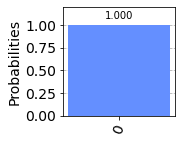

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


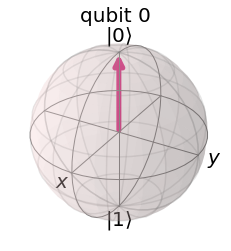

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, Latex

n = 1
qc = QuantumCircuit(n)
print('Com probabilidade máxima (igual 1) o qubit se econtra no estado 0.')

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
display(plot_histogram(results, figsize = (2,2)))

state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(state)

Aplicando o gate Hadamard (H). 

Esse gate é o utilizado para criar um estado de um qubit em superposição. 

O que acontece (fisicamente) é uma rotação. 

Mudados a representação do qubit - da base computacional $\{\vert 0\rangle,\vert 1\rangle\}$ para base $\{\vert + \rangle, \vert - \rangle \}$


$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

$$
H\vert \psi_0\rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle +  \vert 1 \rangle)
$$



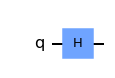

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


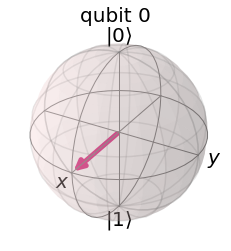

In [5]:
# Colocando em superposição
qc = QuantumCircuit(n)
qc.h(0) 
display(qc.draw())

state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(state)


$$\displaystyle H \vert 0 \rangle \to \frac{\vert 0\rangle + \vert 1 \rangle}{\sqrt{2}}$$

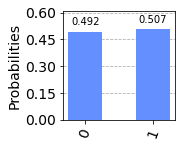

In [14]:

# print('--- O resultado abaixo mostra que temos um qubit em superposição.')
# print("--- Apesar termos 50% de chance de medir o estado 0 ou  1, só conseguimos extrair um bit \ 
#       de informação do sistema. O número de bits (clássicos) de informação extraídos \
#       do sistema será, no máximo, igual ao número qubits")
# print("--- O nosso resultado será 0 ou 1")

qc = QuantumCircuit(n,1)
qc.h(0)
qc.measure(0,0)


backend = Aer.get_backend('qasm_simulator')
results = execute(qc,backend, shots=10000).result().get_counts()
plot_histogram(results, figsize=(2,2))


### Visualização na esfera de Bloch

1. Base computacional $\{ \vert 0\rangle,\vert 1\rangle \}$
2. Base de Fourier $\{\vert + \rangle, \vert - \rangle\}$ equivalente a $\{\vert X^{+} \rangle, \vert X^{-} \rangle\}$

--------- Mostra a posição de cada um dos qubits na esfera de Bloch ---------


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


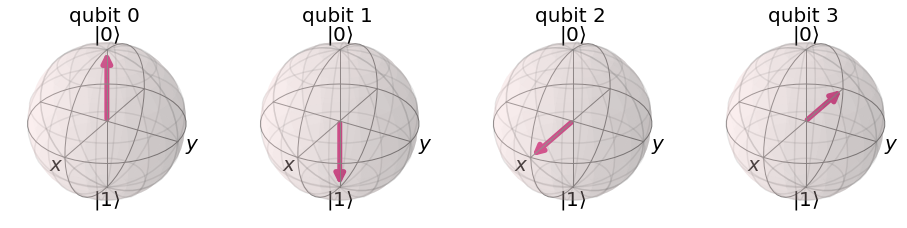

In [16]:
n = 4

qc = QuantumCircuit(n)
qc.id(0) # nao faz nada no qubit 0
qc.x(1)  # flipa o qubit 1 --- 0->1
qc.h(2)  # coloca o qubit 2 em superposição: |0> = |0> + |1>
qc.x(3)  # flipa o qubit 3 --- |0> -> |1>
qc.h(3)  # coloca o qubit 3 em superposção: |1> = |0> - |1>
qc.draw()

print("--------- Mostra a posição de cada um dos qubits na esfera de Bloch ---------")
backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(results)

# Medição de um estado em superposição:

Existe uma **probabilidade** de medir o estado em uma das configurações. 
A palavra probabilidade acima está no sentido de que não é possível medir o estado o estado 0 e 1 **simultaneamente**.

O resultado será 0 ou 1.

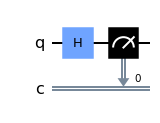

----------O resultado da medida de um qubit em superposição.---------



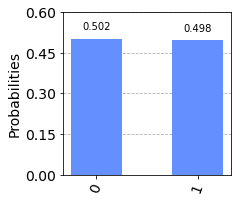

Ao rodar 10000 vezes experimento, o resultado 0 apareceu 5020 vezes e resultado 1 ocorreu 4980 vezes


------ Visualização da medida do experimento rodando quatro vezes ------



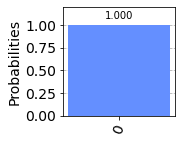

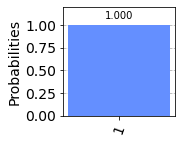

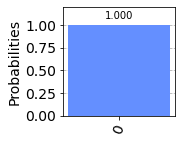

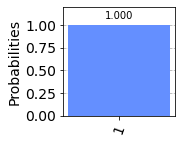

In [17]:
n = 1
qc = QuantumCircuit(n,1)
qc.h(0)
qc.measure(0,0)
display(qc.draw())

# |0> ---> H ----->|0> + |1>

print('----------O resultado da medida de um qubit em superposição.---------\n')
shots = 10000
backend = Aer.get_backend('qasm_simulator')
results = execute(qc,backend, shots=shots).result().get_counts()
display(plot_histogram(results,figsize = (3,3)))

state0 = results['0']
state1 = results['1']

print(f'Ao rodar {shots} vezes experimento, o resultado 0 apareceu {state0} \
vezes e resultado 1 ocorreu {state1} vezes')

print("\n\n------ Visualização da medida do experimento rodando quatro vezes ------\n")
for i in range(4):
    results = execute(qc,backend, shots = 1).result().get_counts()
    display(plot_histogram(results, figsize=(2,2)))

# Gates de que atuam em um único qubit

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$$

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

$$
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
$$

$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

$$
P = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & e^{i\pi \theta} \end{bmatrix}
$$

## Abaixo observe como cada gate atua alterando a posição do qubit dentro da esfera de Boch

In [81]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

# Estados de dois qubits

Colocando estado de dois qubits em superpição.

1. Estado inicial:
$$
\vert \psi_0 \rangle = \vert 00 \rangle
$$

2. Aplicar Hadamard em ambos os qubits:

$
\vert \psi_1 \rangle = H^{\otimes^2}\vert 00 \rangle
$

$
\vert \psi_1 \rangle = H\vert 0 \rangle\otimes  H\vert 0 \rangle
$

$
\vert \psi_1 \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)\otimes \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)
$

$
\vert \psi_1 \rangle = \displaystyle\frac{1}{2} (\vert 00 \rangle + \vert 01 \rangle + \vert 10 \rangle + \vert 11 \rangle)
$

## **Cada estado tem a mesma probabilidade de ser medido** 

$$p(\vert q_i,q_j\rangle) = \displaystyle \left(\frac{1}{2}\right)^2 = 0.25$$

### Abaixo mostramos a visualização desse estado usando qiskit

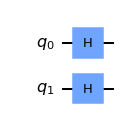

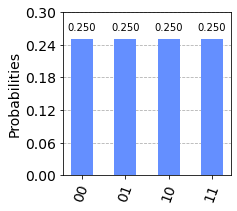

In [22]:
n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.h(1)
# qc.measure(range(n), range(n))
display(qc.draw())

#|0> -> H -> |0> + |1>
#|00> -> H|0>*Id|0> = (|0> + |1>)(|0>) = (|00> + |10>) Estado nao emaranhado

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
plot_histogram(results, figsize = (3,3))



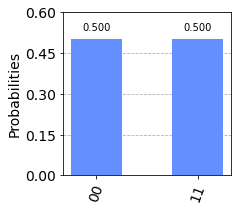

In [26]:
n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
# qc.measure(0,0)
# qc.measure(1,1)




qc.draw()

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
plot_histogram(results, figsize = (3,3))


#|0> -> H -> |0> + |1>
#|00> -> H|0>*Id|0> = (|0> + |1>)(|0>) = (|00> + |10>) aplicar CNOT (|00> + |11>) - Estado Emaranhado


# Atenção para ordenamento de qubits no Qiskit

Ordenamento padrão:

$\vert q_{0} q_1 \dots q_{n-1}\rangle$

Ordenamento de qubits no **qiskit**:

$\vert q_{n-1} \dots q_1 q_0\rangle$

